In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### PCA - Used to reduce dimensions - Unsupervised learning
<pre>
1) Standardize the dataset.
2) Compute Covaraince Matrix from the Standardized dataset.
3) Compute Eigen values and eigen vectors from the Covaraince Matrix.
Arrange Eigen Vectors in decreasing order of Eigen values.

4) Select Feature matrix which is min number of eigen vectors required to generate the principal components.
5) Generate Pcincipal Components from the Feature matrix
</pre>

#### Read the dataset

In [91]:
df = pd.read_csv('houseprice.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [92]:
df.shape

(1460, 81)

#### Data Preprocessing

#### Handle Null Values

In [93]:
def fetch_null_val(data):
    nv = data.isnull().sum()
    nv = nv[nv>0]
    nv_df = pd.DataFrame({'Feature':nv.index,'Null_Count':nv.values,
                         '%Null':(nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('%Null',ascending=False)
    return nv_df

In [94]:
nv_df = fetch_null_val(df)
nv_df

,Feature,Null_Count,%Null
16,PoolQC,1453,99.520548
18,MiscFeature,1406,96.301370
1,Alley,1369,93.767123
17,Fence,1179,80.753425
10,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
11,GarageType,81,5.547945
12,GarageYrBlt,81,5.547945
13,GarageFinish,81,5.547945
14,GarageQual,81,5.547945


In [95]:
df1 = df.copy()

In [96]:
cols = ['PoolQC','MiscFeature','Alley','Fence']
for i in cols:
    print(i,df[i].unique())

PoolQC [nan 'Ex' 'Fa' 'Gd']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']
Alley [nan 'Grvl' 'Pave']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [97]:
df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [98]:
nv_df = fetch_null_val(df)
nv_df

,Feature,Null_Count,%Null
9,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
10,GarageType,81,5.547945
11,GarageYrBlt,81,5.547945
12,GarageFinish,81,5.547945
13,GarageQual,81,5.547945
14,GarageCond,81,5.547945
5,BsmtExposure,38,2.602740
7,BsmtFinType2,38,2.602740
3,BsmtQual,37,2.534247


In [99]:
nv_df['Feature'].values

array(['FireplaceQu', 'LotFrontage', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure',
       'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'Electrical'], dtype=object)

#### Basement related Features

In [100]:
cols = ['BsmtExposure','BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']
for i in cols:
    print(i,df[i].unique())

BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType2 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond ['TA' 'Gd' nan 'Fa' 'Po']
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']


In [101]:
cols = ['BsmtExposure','BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']
for i in cols:
    df[i] = df[i].fillna('No Basement')

#### Garege Related Faetures

In [102]:
cols = ['GarageType','GarageFinish', 'GarageQual', 'GarageCond']  #  'GarageYrBlt'
for i in cols:
    print(i,df[i].unique())

GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish ['RFn' 'Unf' 'Fin' nan]
GarageQual ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [103]:
cols = ['GarageType','GarageFinish', 'GarageQual', 'GarageCond']
for i in cols:
    df[i] = df[i].fillna('No Garage')

In [104]:
cols = ['LotFrontage','MasVnrArea']
for i in cols:
    print(df[i].value_counts())

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64


In [105]:
cols = ['LotFrontage','MasVnrArea']
for i in cols:
    df[i] = df[i].fillna(df[i].median())

In [106]:
nv_df = fetch_null_val(df)
nv_df

,Feature,Null_Count,%Null
2,FireplaceQu,690,47.260274
3,GarageYrBlt,81,5.547945
0,MasVnrType,8,0.547945
1,Electrical,1,0.068493


In [107]:
df['GarageYrBlt'].nunique()

97

In [108]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])

# df['GarageYrBlt'].mode()[0] or df['GarageYrBlt'].mode().max()

In [109]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [110]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')

In [111]:
nv_df = fetch_null_val(df)
nv_df

,Feature,Null_Count,%Null
0,MasVnrType,8,0.547945
1,Electrical,1,0.068493


In [112]:
df.shape

(1460, 77)

In [113]:
df.dropna(inplace=True)

In [114]:
df.shape

(1451, 77)

In [115]:
nv_df = fetch_null_val(df)
nv_df

,Feature,Null_Count,%Null


#### Duplicates

In [116]:
df.duplicated().sum()

0

In [117]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 77, dtype: object

In [118]:
df.drop('Id',axis=1,inplace=True)

In [119]:
df.shape

(1451, 76)

### EDA

In [120]:
df['Utilities'].value_counts()

AllPub    1450
NoSeWa       1
Name: Utilities, dtype: int64

In [121]:
df.drop('Utilities',axis=1,inplace=True)
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchS

In [122]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', '

In [123]:
for i in cat_cols:
    print(i,df[i].nunique())

MSZoning 5
Street 2
LotShape 4
LandContour 4
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
KitchenQual 4
Functional 7
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
SaleType 9
SaleCondition 6


In [124]:
# df['Neighborhood'].value_counts()

In [125]:
cols = ['Street','CentralAir']
for i in cols:
    print(i)
    print(df[i].value_counts())

Street
Pave    1445
Grvl       6
Name: Street, dtype: int64
CentralAir
Y    1356
N      95
Name: CentralAir, dtype: int64


In [126]:
df.drop(['Street'],axis=1,inplace=True)

In [127]:
df.shape

(1451, 74)

In [128]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')


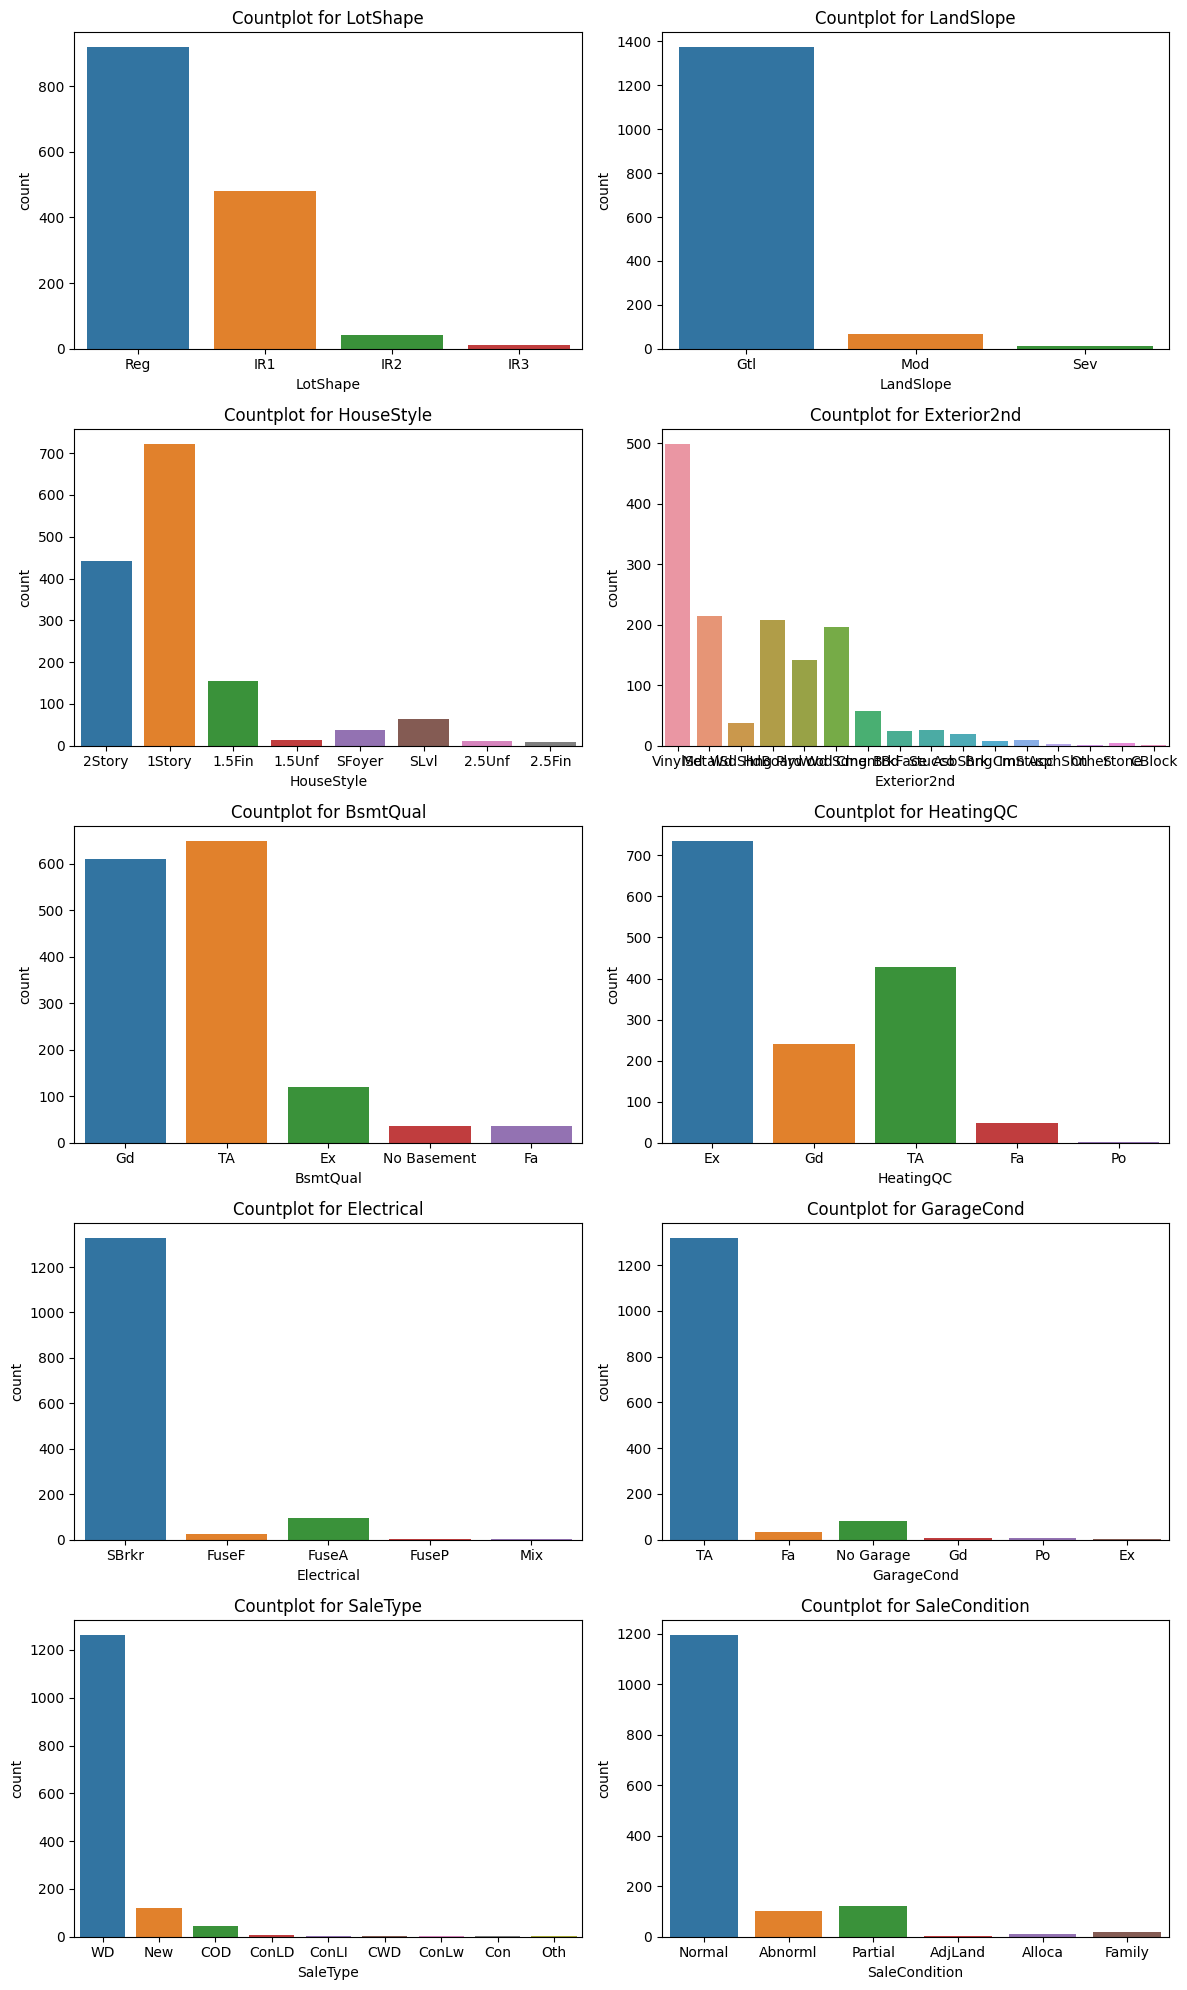

In [129]:
cols = ['LotShape','LandSlope','HouseStyle','Exterior2nd','BsmtQual',
        'HeatingQC','Electrical','GarageCond','SaleType', 'SaleCondition']

plt.figure(figsize=(12,20))
for i in range(len(cols)):
    plt.subplot(5,2,i+1)
    sns.countplot(x=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

In [130]:
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

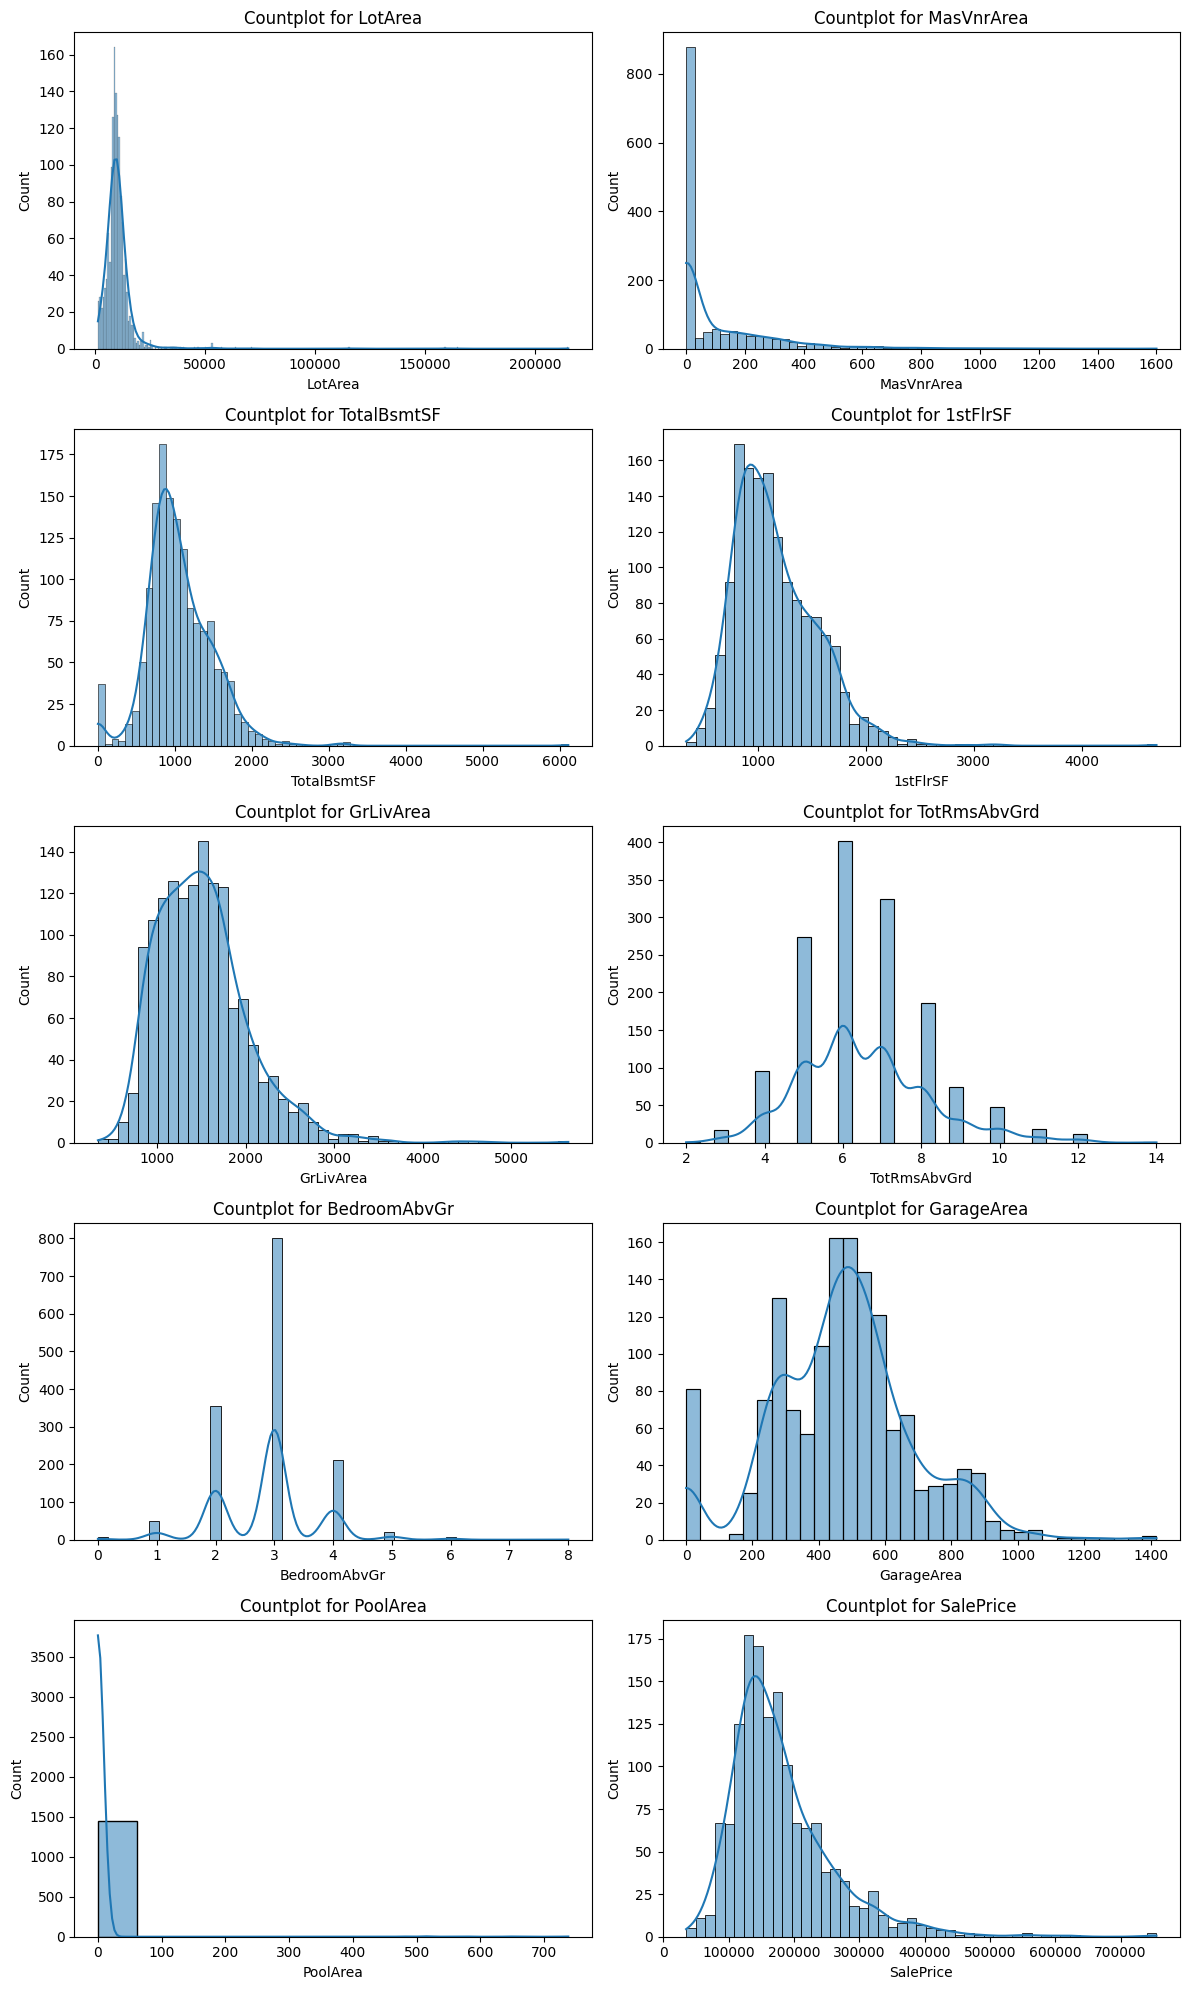

In [131]:
cols = ['LotArea','MasVnrArea','TotalBsmtSF','1stFlrSF','GrLivArea',
        'TotRmsAbvGrd','BedroomAbvGr','GarageArea','PoolArea', 'SalePrice']

plt.figure(figsize=(12,20))
for i in range(len(cols)):
    plt.subplot(5,2,i+1)
    sns.histplot(x=df[cols[i]],kde=True)
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

#### Corr 

In [132]:
num_cols = df.dtypes[df.dtypes!='object'].index
print(num_cols)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


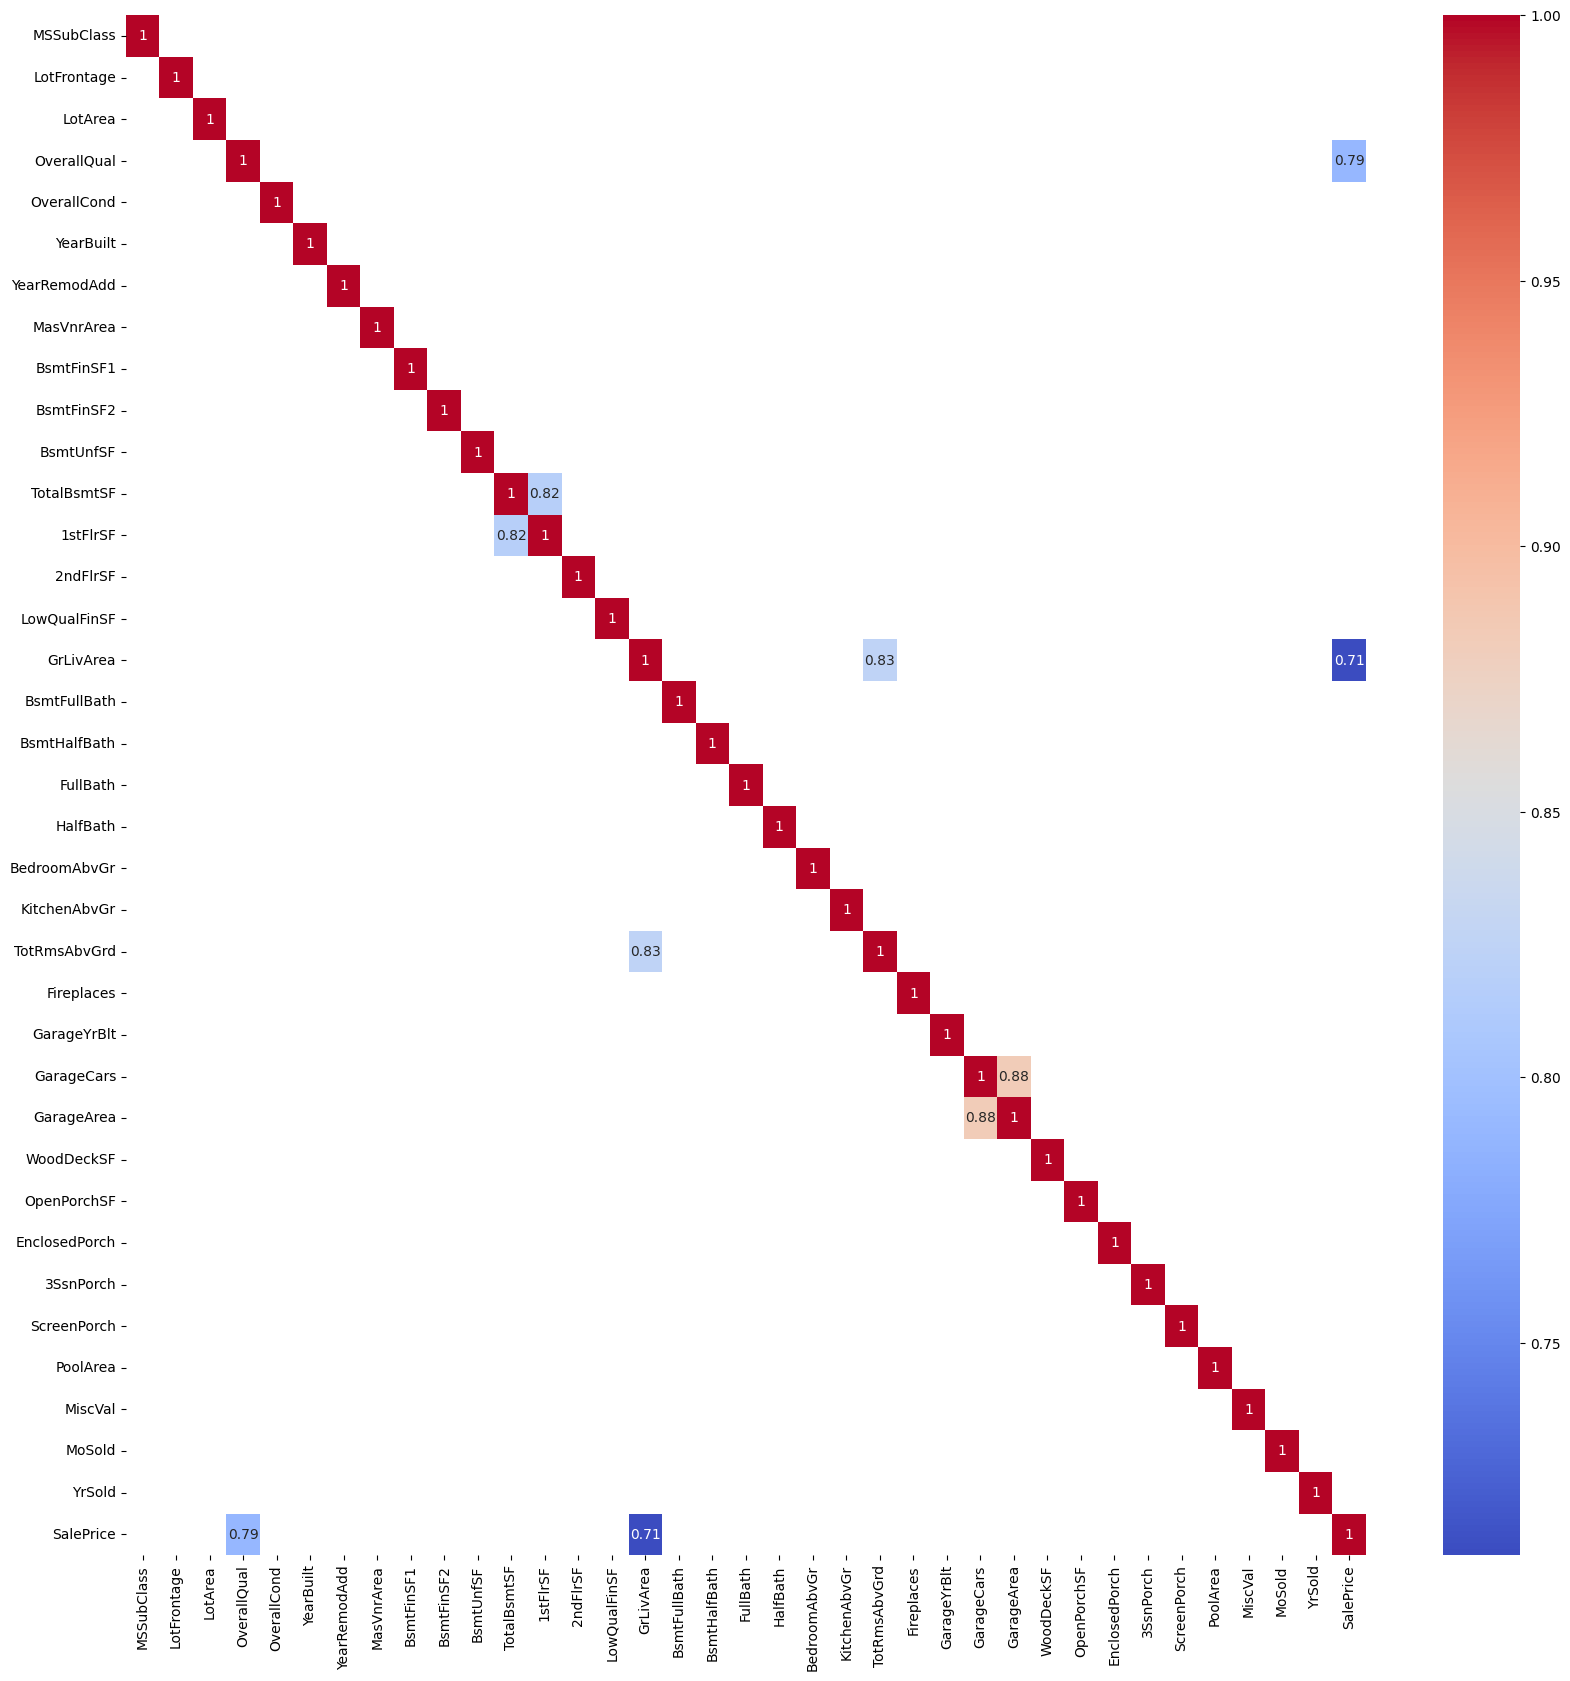

In [133]:
corr = df[num_cols].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr[abs(corr)>=0.7],annot=True,cmap='coolwarm')
plt.show()

#### Outlier Treatment

In [134]:
a = df.describe(percentiles=[0.01,0.02,0.03,0.05,0.097,0.98,0.99]).T  # T = transpose
a = a.iloc[:,3:]
a

,min,1%,2%,3%,5%,9.7%,50%,98%,99%,max
MSSubClass,20.0,20.0,20.0,20.0,20.0,20.00,50.0,190.0,190.0,190.0
LotFrontage,21.0,21.0,24.0,30.0,36.0,48.00,69.0,121.0,137.5,313.0
LotArea,1300.0,1680.0,2117.0,2522.0,3273.0,4974.80,9477.0,25095.0,37802.0,215245.0
OverallQual,1.0,3.0,4.0,4.0,4.0,4.65,6.0,9.0,10.0,10.0
OverallCond,1.0,3.0,3.0,4.0,4.0,5.00,5.0,8.0,9.0,9.0
YearBuilt,1872.0,1899.0,1908.0,1910.0,1916.0,1924.00,1972.0,2008.0,2009.0,2010.0
YearRemodAdd,1950.0,1950.0,1950.0,1950.0,1950.0,1950.00,1993.0,2008.0,2009.0,2010.0
MasVnrArea,0.0,0.0,0.0,0.0,0.0,0.00,0.0,651.0,792.0,1600.0
BsmtFinSF1,0.0,0.0,0.0,0.0,0.0,0.00,381.0,1443.0,1572.5,5644.0
BsmtFinSF2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,661.0,832.0,1474.0


In [135]:
# 10-12

In [136]:
print(df[df['SalePrice']<61691.5].shape)
print(df[df['GrLivArea']<692].shape)
print(df[df['LotArea']<1680.0].shape)

# df['SalePrice'] = np.where(df['SalePrice']<61691.5,61691.5,df['SalePrice'])

(15, 74)
(15, 74)
(7, 74)


In [137]:
df.shape

(1451, 74)

In [138]:
cols_left_skewed = ['LotArea','1stFlrSF','GrLivArea','SalePrice']

def ot_left_skewed(x):
    x = x.clip(lower=x.quantile(0.01))
    return x 

In [139]:
a.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [140]:
cols_right_skewed = ['LotFrontage','LotArea','MasVnrArea', 'BsmtFinSF1', 
                     'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                     'LowQualFinSF','GrLivArea','GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                     'EnclosedPorch', '3SsnPorch', 'ScreenPorch','MiscVal','SalePrice']

def ot_right_skewed(x):
    x = x.clip(upper=x.quantile(0.99))
    return x 

In [141]:
df1 = df.copy()

In [142]:
df[cols_left_skewed] = df[cols_left_skewed].apply(ot_left_skewed)
df[cols_right_skewed] = df[cols_right_skewed].apply(ot_right_skewed)

In [143]:
a = df.describe(percentiles=[0.01,0.02,0.03,0.05,0.097,0.98,0.99]).T  # T = transpose
a = a.iloc[:,3:]
a

,min,1%,2%,3%,5%,9.7%,50%,98%,99%,max
MSSubClass,20.0,20.00,20.0,20.0,20.0,20.00,50.0,190.0,190.00,190.0
LotFrontage,21.0,21.00,24.0,30.0,36.0,48.00,69.0,121.0,137.25,137.5
LotArea,1680.0,1680.00,2117.0,2522.0,3273.0,4974.80,9477.0,25095.0,37151.00,37802.0
OverallQual,1.0,3.00,4.0,4.0,4.0,4.65,6.0,9.0,10.00,10.0
OverallCond,1.0,3.00,3.0,4.0,4.0,5.00,5.0,8.0,9.00,9.0
YearBuilt,1872.0,1899.00,1908.0,1910.0,1916.0,1924.00,1972.0,2008.0,2009.00,2010.0
YearRemodAdd,1950.0,1950.00,1950.0,1950.0,1950.0,1950.00,1993.0,2008.0,2009.00,2010.0
MasVnrArea,0.0,0.00,0.0,0.0,0.0,0.00,0.0,651.0,790.00,792.0
BsmtFinSF1,0.0,0.00,0.0,0.0,0.0,0.00,381.0,1443.0,1572.25,1572.5
BsmtFinSF2,0.0,0.00,0.0,0.0,0.0,0.00,0.0,661.0,827.50,832.0


#### Assmumptions of Linear Reg
<pre>
1) No misisng values
2) no/min outliers
3) linearity
4) homoscedasticity
5) no autocorrelation
6) no multicollinearity
7) target variable should be normally dist.
8) Residuals should be normally dist.

In [144]:
df.shape

(1451, 74)

In [147]:
from scipy.stats import shapiro
# Ho : data is normally  dist => p>0.05
# H1 : data is not normally dist => p<=0.05

In [149]:
test_stat,p = shapiro(df['SalePrice'])
print(test_stat)
print(p)

0.9070529937744141
7.462231032940874e-29


In [150]:
test_stat1,p1 = shapiro(np.log(df['SalePrice']))
print(test_stat1)
print(p1)

0.9923861622810364
8.08912488992064e-07


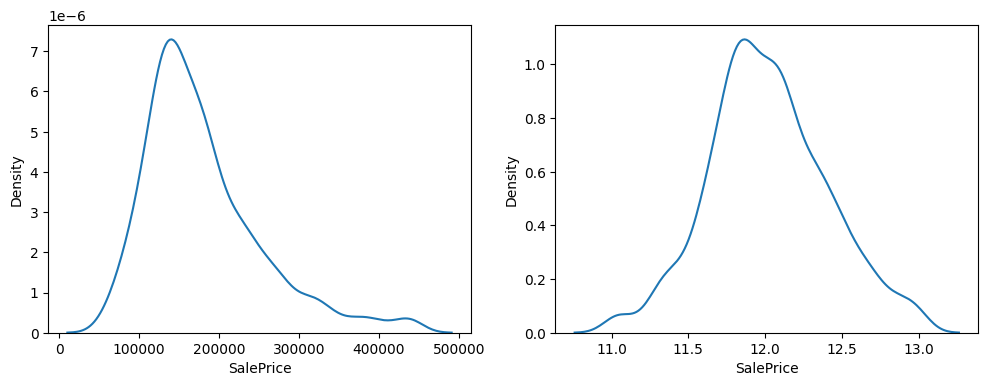

In [151]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(x=df['SalePrice'])
plt.subplot(1,2,2)
sns.kdeplot(x=np.log(df['SalePrice']))
plt.show()

In [154]:
print(p)  # 7.46*10^(-29) = 0.0000000000000000000000000000746 
print(p1) # 8.08*10^(-7)  = 0.000000808

7.462231032940874e-29
8.08912488992064e-07


#### Encoding Catgeorical Features

In [155]:
cat_cols  = df.dtypes[df.dtypes=='object'].index
cat_cols

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [156]:
df_dum = pd.get_dummies(data=df,columns= cat_cols,drop_first=True)
# NeighborHood, 'Exterior1st', 'Exterior2nd',
print(df_dum.shape)
print(df_dum.columns)

(1451, 245)
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=245)


#### Select x and y

In [161]:
x = df_dum.drop('SalePrice',axis=1)
y = np.log(df_dum['SalePrice'])
print(x.shape)
print(y.shape)

(1451, 244)
(1451,)


In [162]:
from sklearn.model_selection import train_test_split

In [163]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1015, 244)
(436, 244)
(1015,)
(436,)


In [164]:
from sklearn.metrics import *

In [165]:
def eval_model(ytest,ypred):
    mae =  mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2 = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse,'RMSE',rmse)
    print('R2_Score',r2)

In [166]:
from sklearn.linear_model import LinearRegression

In [167]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [168]:
ypred_lr1 = lr1.predict(x_test)
eval_model(y_test,ypred_lr1)

MAE 0.09020260668064074
MSE 0.024524708012173158 RMSE 0.15660366538549841
R2_Score 0.8243971011151658


In [170]:
print('Train Score',lr1.score(x_train,y_train))
print('Test Score',lr1.score(x_test,y_test))

Train Score 0.9554195535086778
Test Score 0.8243971011151658


#### Inference
Model is highly overfit

### PCA

In [175]:
print(x_train.shape)
print(x_test.shape)

(1015, 244)
(436, 244)


In [177]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [178]:
sc = StandardScaler()

x_train_sc  = sc.fit_transform(x_train)
x_test_sc  = sc.transform(x_test)
print(x_train_sc.shape)
print(x_test_sc.shape)

(1015, 244)
(436, 244)


In [184]:
pca = PCA()
pca.fit(x_train_sc)

x_train_pcomps = pca.transform(x_train_sc)
x_test_pcomps = pca.transform(x_test_sc)

In [185]:
print(x_train_pcomps.shape)
print(x_test_pcomps.shape)

(1015, 244)
(436, 244)


#### Extract Eigen Values and Eigen Vectors

In [187]:
eig_val = pca.explained_variance_  # eigen_value
print(len(eig_val))
eig_df = pd.DataFrame({'Variance(Eig_Val)': eig_val,
                      'EVR': (pca.explained_variance_ratio_)*100})

# EVR = explained_variance_ratio_
eig_df.head()

244


,Variance(Eig_Val),EVR
0,17.147368,7.137698
1,8.323120,3.464550
2,7.208126,3.000427
3,5.969532,2.484855
4,5.667211,2.359011


In [189]:
eig_df['CumSum_EVR'] = np.cumsum(eig_df['EVR'])
eig_df.head()

,Variance(Eig_Val),EVR,CumSum_EVR
0,17.147368,7.137698,7.137698
1,8.323120,3.464550,10.602248
2,7.208126,3.000427,13.602675
3,5.969532,2.484855,16.087529
4,5.667211,2.359011,18.446540


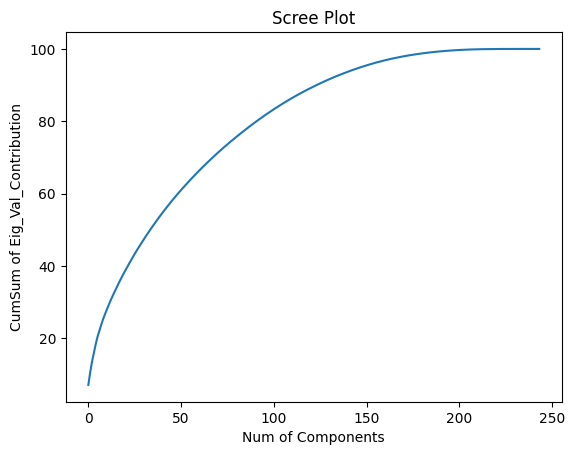

In [191]:
plt.plot(list(range(len(eig_df))),eig_df['CumSum_EVR'])
plt.title('Scree Plot')
plt.xlabel('Num of Components')
plt.ylabel('CumSum of Eig_Val_Contribution')
plt.show()

In [192]:
eig_df.columns # 75

Index(['Variance(Eig_Val)', 'EVR', 'CumSum_EVR'], dtype='object')

In [196]:
eig_df[eig_df['CumSum_EVR']>=75].head(10)

,Variance(Eig_Val),EVR,CumSum_EVR
79,1.012007,0.421254,75.368399
80,1.007875,0.419534,75.787933
81,0.998638,0.415689,76.203622
82,0.992764,0.413244,76.616866
83,0.979820,0.407856,77.024722
84,0.974099,0.405475,77.430197
85,0.963252,0.400959,77.831156
86,0.952151,0.396339,78.227495
87,0.935621,0.389458,78.616953
88,0.932129,0.388004,79.004957


#### Inference
80 PC have cumulative varaince of 75%. Hence out of 244, we need atleast 80 PCs.

In [199]:
pc_cols = ['PC'+str(i) for i in range(1,245)]

In [206]:
print(x_train_pcomps.shape)

(1015, 244)


In [204]:
x_train_pcomps_df = pd.DataFrame(x_train_pcomps,columns = pc_cols)
x_test_pcomps_df = pd.DataFrame(x_test_pcomps,columns = pc_cols)
print(x_train_pcomps_df.shape)
print(x_test_pcomps_df.shape)

(1015, 244)
(436, 244)


#### Select 80 features from x_train_pcomps and 80 features from x_test_pcomps

In [208]:
x_train_pcomps_df = x_train_pcomps_df.iloc[:,:80]
x_test_pcomps_df = x_test_pcomps_df.iloc[:,:80]
print(x_train_pcomps_df.shape) # => Independent features for train data
print(x_test_pcomps_df.shape)  # => Independent features for test data

(1015, 80)
(436, 80)


#### Linear Regression after PCA

In [211]:
lr2 = LinearRegression()
lr2.fit(x_train_pcomps_df,y_train)

LinearRegression()

In [213]:
ypred_lr2 = lr2.predict(x_test_pcomps_df)
eval_model(y_test,ypred_lr2)

MAE 0.09322122236269599
MSE 0.017651000687147648 RMSE 0.13285706863824615
R2_Score 0.8736145242853527


In [214]:
print('Train Score', lr2.score(x_train_pcomps_df,y_train))
print('Test Score', lr2.score(x_test_pcomps_df,y_test))

Train Score 0.9004585105278875
Test Score 0.8736145242853527


In [215]:
print('Train Score',lr1.score(x_train,y_train))
print('Test Score',lr1.score(x_test,y_test))

Train Score 0.9554195535086778
Test Score 0.8243971011151658


In [216]:
#### PCA - Cons
# 1) Overfitting reduces.
# 2) Time minimise complexity.

#### Loadings Matrix

In [219]:
eig_vec = pca.components_
print(eig_vec.shape)

(244, 244)


In [221]:
loadings_matrix = pd.DataFrame(eig_vec.T*np.sqrt(eig_val),columns=pc_cols,index=x_train.columns)
loadings_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC235,PC236,PC237,PC238,PC239,PC240,PC241,PC242,PC243,PC244
MSSubClass,0.031145,0.300481,-0.150057,0.002624,-0.071980,-0.454253,0.347288,0.370786,0.099948,-0.024697,...,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00
LotFrontage,-0.269069,-0.168462,0.186441,0.331338,0.122079,0.231109,-0.314080,-0.098992,0.003800,0.033805,...,4.417116e-32,-7.384366e-33,1.540098e-32,-3.640918e-32,2.198864e-32,4.176135e-33,9.278318e-33,-2.398398e-32,-6.516652e-32,-8.347105e-33
LotArea,-0.253855,-0.314094,0.239183,0.463795,0.214087,0.053187,0.024780,-0.254392,-0.047337,0.114603,...,8.969495e-34,1.708948e-33,8.693184e-33,2.263396e-32,2.773222e-32,2.214993e-33,3.413420e-33,-1.858154e-33,9.778671e-33,-1.907873e-33
OverallQual,-0.794936,0.077131,-0.070774,0.196790,-0.001456,0.033436,0.075938,0.112048,-0.007931,-0.139913,...,6.329541e-33,4.470766e-32,3.108662e-32,4.469771e-33,-1.763991e-32,-1.728415e-32,2.225145e-32,-6.045079e-33,-6.085893e-33,-3.786313e-32
OverallCond,0.214932,-0.221778,-0.163624,0.076855,-0.034556,-0.116392,0.049332,-0.110052,-0.177199,-0.114903,...,4.683716e-32,5.581626e-33,-2.391054e-32,-8.893436e-33,-2.178022e-32,-2.509131e-32,-1.842526e-32,6.404174e-33,-1.963832e-32,-4.549655e-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.099950,0.128896,0.080768,0.000036,0.169677,-0.035641,-0.034809,0.008385,0.017142,0.068101,...,9.010954e-33,5.706133e-34,-7.184584e-33,9.579347e-33,6.801085e-33,1.606211e-33,-2.766636e-32,-2.148885e-32,1.969700e-33,-2.926952e-33
SaleCondition_Alloca,0.044369,0.084415,0.251090,0.072768,-0.018135,-0.101217,0.039191,0.025803,0.027456,0.098565,...,1.873317e-33,1.251919e-32,-1.363224e-32,-1.759078e-32,1.046166e-32,-2.027704e-32,-5.074948e-33,1.486801e-32,-1.845891e-33,3.372241e-33
SaleCondition_Family,0.030811,-0.029271,-0.030048,0.029536,-0.040709,0.040095,-0.009181,0.058116,-0.012651,0.066193,...,2.475425e-32,-1.072865e-32,-1.037635e-32,-3.382781e-32,1.949558e-32,-1.038842e-32,6.915957e-33,5.521059e-34,1.690864e-32,-9.056322e-33
SaleCondition_Normal,0.218523,-0.212738,-0.045475,-0.005049,-0.049083,-0.326228,-0.032038,-0.253943,-0.005458,-0.447057,...,6.968207e-33,1.133525e-32,2.221411e-32,-2.456070e-32,4.402876e-33,5.587614e-33,2.197685e-33,7.253076e-33,1.772579e-33,-1.624938e-32


In [222]:
### PCA
# 1) Eigen Decomposition of Covariance Matrix
# 2) SVD

### PCA using SVD (Singular Value Decomposition)

In [225]:
from scipy.linalg import svd

#### SVD
A(n * m) = U(n * n) * sigma(n * m) * VT(m * m)

A  => matrix for which we need to compute covariace matrix

Covariance = X * XT /(n-1),   where T = transpose

In [ ]:
# Ex:
# A(2*3) = U(2*2) * sigma(2*3) * VT(3*3)

In [227]:
a = np.array([[1,2,3],[4,5,6]])
u, sigma, vt = svd(a)
print(u)
print(sigma)
print(vt)

[[-0.3863177  -0.92236578]
 [-0.92236578  0.3863177 ]]
[9.508032   0.77286964]
[[-0.42866713 -0.56630692 -0.7039467 ]
 [ 0.80596391  0.11238241 -0.58119908]
 [ 0.40824829 -0.81649658  0.40824829]]


In [228]:
sigma1 = np.array([[9.508032,0,0],[0,0.77286964,0]])
sigma1

array([[9.508032  , 0.        , 0.        ],
       [0.        , 0.77286964, 0.        ]])

In [230]:
res = np.dot(np.dot(u,sigma1),vt)
print(res)

[[1. 2. 3.]
 [4. 5. 6.]]


<img src="pca_using_svd.png">